In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:

df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [3]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [4]:
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [5]:
# Putting feature variable to X
X = df.drop('target',axis=1)
# Putting response variable to y
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)
X_train.shape, X_test.shape

((700, 13), (300, 13))

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

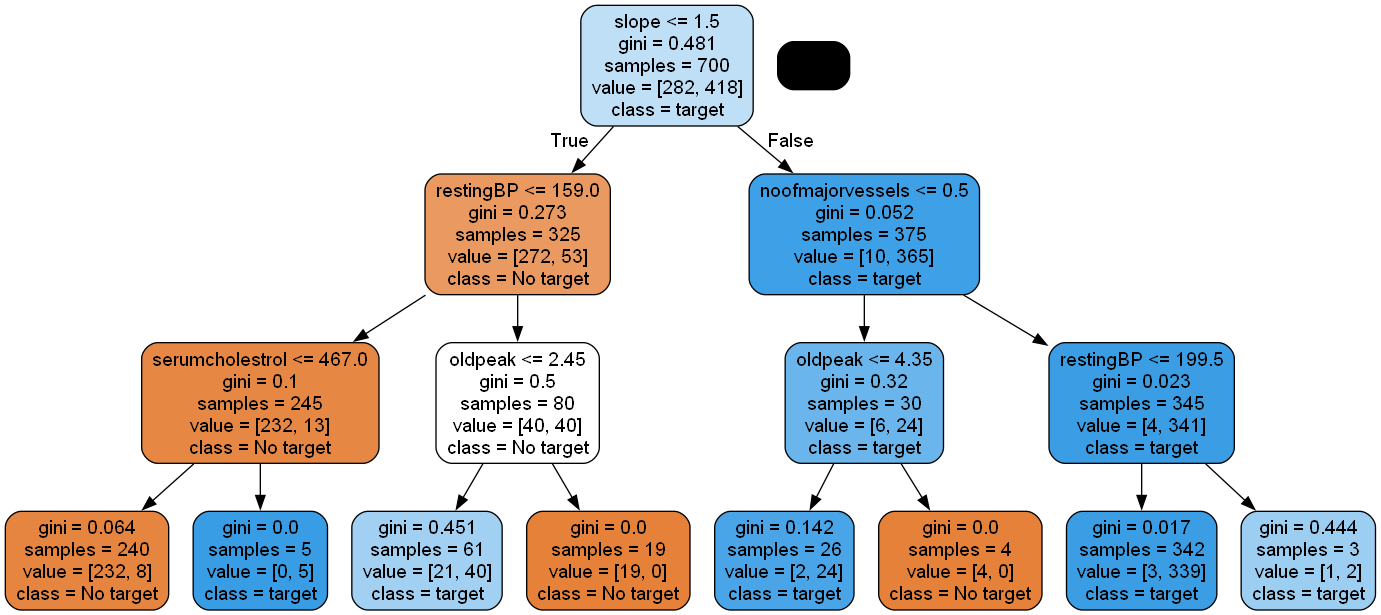

In [11]:
# plotting tree with max_depth=3
import pydotplus, graphviz
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,feature_names=X.columns,class_names=['No target', "target"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [12]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.95


array([[255,  27],
       [  8, 410]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9466666666666667


array([[129,   9],
       [  7, 155]], dtype=int64)